# Анализ трендов популярности игр

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## Описание данных

- name - **название игры**
- platform - **игровая платформа**
- year_of_release - **год выпуска**
- genre - **жанр игры**
- na_sales - **продажи в Северной Америке (миллионы проданных копий)**      
- eu_sales - **продажи в Европе (миллионы проданных копий)**      
- jp_sales - **продажи в Японии (миллионы проданных копий)**      
- other_sales - **продажи в других странах (миллионы проданных копий)**      
- critic_score - **оценка критиков (максимум 100)**    
- user_score - **оценка пользователей (максимум 10)**     
- rating - **рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию**        
- na_sales_sum - **суммарные продажи в Северной Америке (миллионы проданных копий)**     
- eu_sales_sum - **суммарные продажи в Европе (миллионы проданных копий)**    
- jp_sales_sum - **суммарные продажи в Японии (миллионы проданных копий)**    
- other_sales_sum - **суммарные продажи в других странах (миллионы проданных копий)**

## Работа с проектом ##

### Открываю файл с данными и изучаю общую информацию

**Импортирую все необходимые библиотеки для проекта**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

**Открываю файл с данными**

In [2]:
data = pd.read_csv('/datasets/games.csv')

**Вывожу на экран первые 5 строк, изучаю данные**

In [3]:
display(data.head(5))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Вывожу сводную информацию о таблице**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Строю гистограммы для каждого столбца**

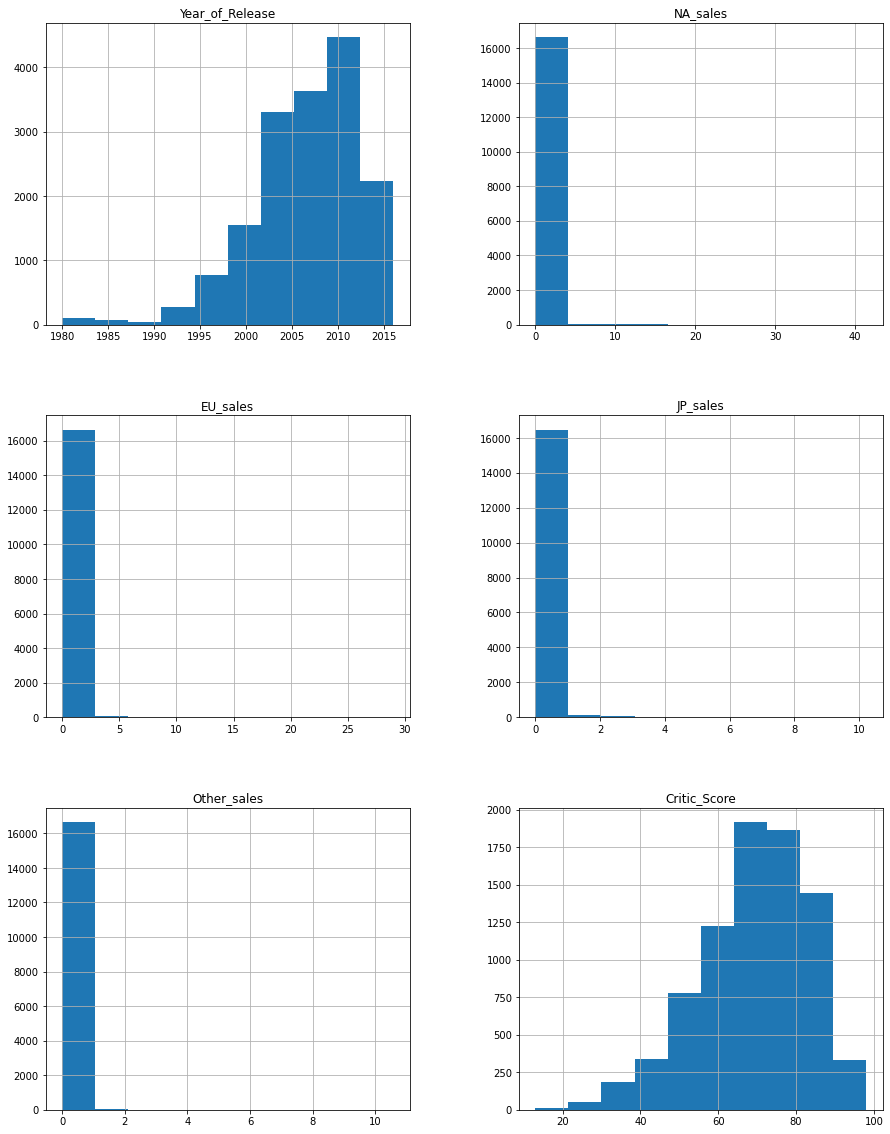

In [5]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 20))
plt.show()

### Подготавливаю данные

**Переименовываю все столбцы, привожу названия к нижнему регистру**

In [6]:
data = data.rename(
    columns={
        'Name': 'name',
        'Platform': 'platform',
        'Year_of_Release': 'year_of_release',
        'Genre': 'genre',
        'NA_sales': 'na_sales',
        'EU_sales': 'eu_sales',
        'JP_sales': 'jp_sales',
        'Other_sales': 'other_sales',
        'Critic_Score': 'critic_score',
        'User_Score': 'user_score',
        'Rating': 'rating'
    }
)

**Преобразовываю данные в нужные типы данных**

Прежде, чем преобразовать типы данных, мне необходимо избавить от пропусков в тех столбцах, в которых сделать это будет не критично. В столбцах name, year_of_release и genre я могу удалить все строчки, где есть пропуски значений, так как это уменьшит количество общих данных всего на 1,6%

In [7]:
data = data.dropna(subset=['name', 'year_of_release', 'genre'])

Преобразовываю столбец year_of_release из float в int, так как год не может быть дробным числом

In [8]:
data['year_of_release'] = data['year_of_release'].astype('int')

Мне необходимо изменить тип данных столбца user_score с Проверяю уникальные значения столбца user_score с object на float. Для этого для начала я проверяю все уникальные значения столбца

In [9]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Так как мы видим в уникальных значениях помимо nan, ещё и tbd, я выполняю команду, чтобы все значения tbd приравнялись к значениям nan

In [10]:
data['user_score'] = data['user_score'].replace('tbd')

Снова проверяю на уникальные значения столбец user_score

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

После замены tbd на nan, я изменяю тип данных стобца с object на float

In [12]:
data['user_score'] = data['user_score'].astype('float')

**Меняю все пропущенные значения в столбце rating на unknown**

In [13]:
data['rating'] = data['rating'].fillna('unknown')

Проверяю, изменились ли все типы данных

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8610 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


На данный момент таблица выглядит гораздо лучше, все типы данных приведены в нужный вид, а также я избавился от пропущенных значений в тех столбцах, где это было допустимо. В столбцах user_score и critic_score невозможно заполнить пропуски медианными или средними значениями, так как отсутствует 54-55% данных. Если я попытаюсь это сделать, данные потеряют точность, а продолжение дальнейшего выполнения проекта утратит смысл. В столбцах name, year_of_release и genre я могу удалить все строчки, где есть пропуски значений, так как это уменьшит количество общих данных всего на 1,6%, что вполне допустимо. И в столбце rating я также могу добавить недостающие данные, записав рейтинг игры как unknown, что никак не повлияет на результаты исследования

**Считаю суммарные продажи в каждом регионе, добавляю для каждого региона отдельный столбец**

In [15]:
data['na_sales_sum'] = data['na_sales'].sum()
data['eu_sales_sum'] = data['eu_sales'].sum()
data['jp_sales_sum'] = data['jp_sales'].sum()
data['other_sales_sum'] = data['other_sales'].sum()

Проверяю общую таблицу после предобработки данных

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       8610 non-null   float64
 10  rating           16444 non-null  object 
 11  na_sales_sum     16444 non-null  float64
 12  eu_sales_sum     16444 non-null  float64
 13  jp_sales_sum     16444 non-null  float64
 14  other_sales_sum  16444 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 2.0+ MB


### Провожу исследовательский анализ данных

**Проверяю количество игр, которые выпускались ежегодно**

In [17]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1990      16
1987      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

**Строю диаграмму с количеством игр, которые выходили ежегодно**

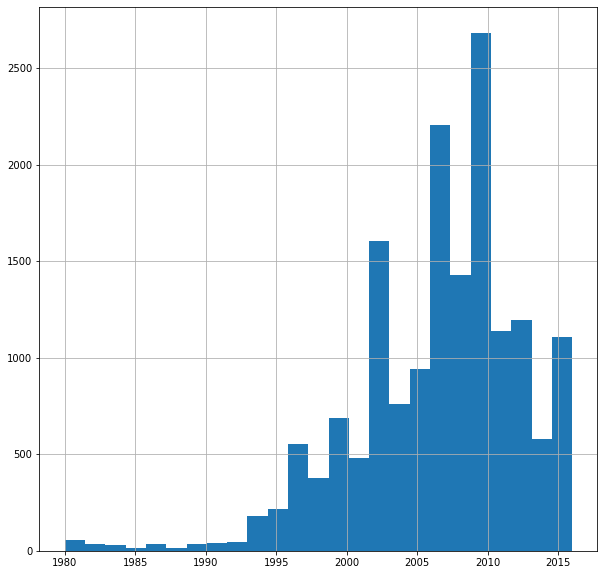

In [18]:
data['year_of_release'].hist(bins = 25, figsize=(10, 10))
plt.show()

**Строю график с количеством игр, которые выходили ежегодно**

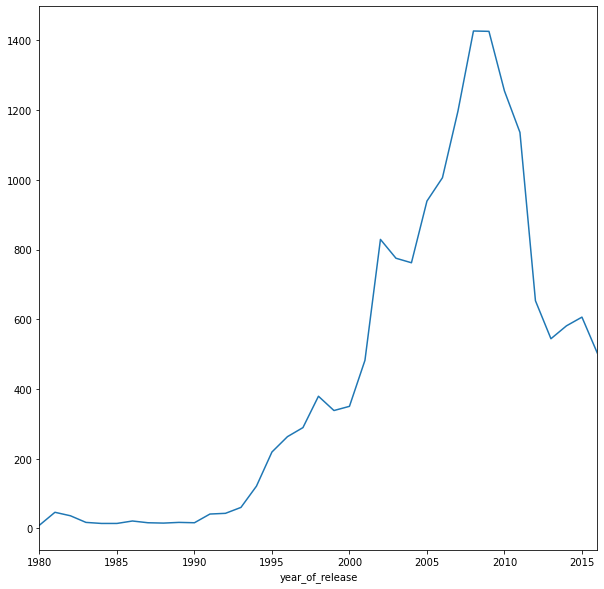

In [19]:
data.groupby('year_of_release')['name'].count().plot(xlim=(1980, 2016), figsize=(10, 10))
plt.show()

Судя по графику, вижу заметный прирост по количеству выпускаемых игр, начиная с 1980 года и по 2010 год, затем наблюдается небольшой спад

**Считаю сумму продаж во всех регионах по каждой игре и добавляю этот столбец в общую таблицу**

In [20]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

**Выделяю 10 самых популярных платформ по продажам в мире**

In [21]:
most_expensive = data.groupby('platform').sum()['total_sales'].sort_values(ascending=False).index.values[:10]
print(most_expensive)

['PS2' 'X360' 'PS3' 'Wii' 'DS' 'PS' 'PS4' 'GBA' 'PSP' '3DS']


**Строю график суммарных продаж платформ за всё время**

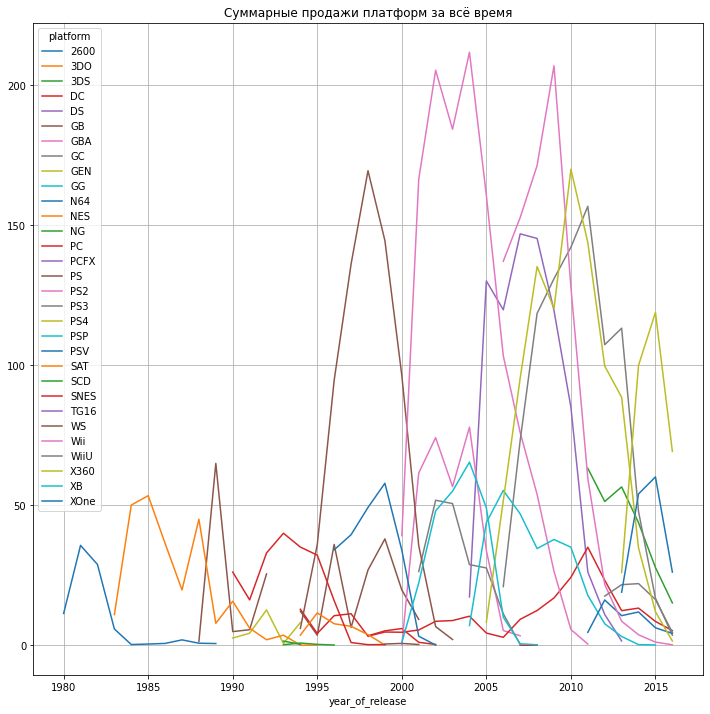

In [22]:
total_sales_sum_2 = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(figsize = (12, 12), grid=True, title = 'Суммарные продажи платформ за всё время')
plt.show()

**Строю график total_sales_sum, на котором будут собраны данные по суммарным продажам для каждой платформы**

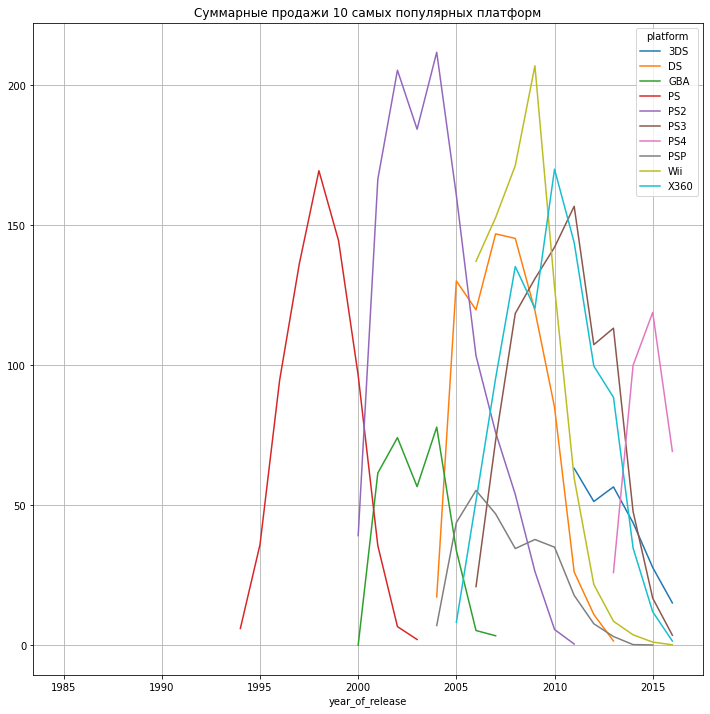

In [23]:
popular = data[data['platform'].isin(most_expensive)]

total_sales_sum = popular.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(figsize = (12, 12), grid=True, title = 'Суммарные продажи 10 самых популярных платформ')
plt.show()

Судя по графику выше, видно, что каждая новая платформа набирает популярность примерно 3-5 лет, после чего появляется новая, а старая теряет популярность. Так происходит примерно с каждой из 10 самых популярных платформ

Выбираю актуальными данные, начиная с 2006 года и заканчивая 2015, так как в этот период выходило набольшее количество игр в год (500+). Делаю срез данных

In [24]:
data = data.query("2013 <= year_of_release <= 2015")

**Строю график с суммарными продажами по всем платформам с 2013 по 2015 годы**

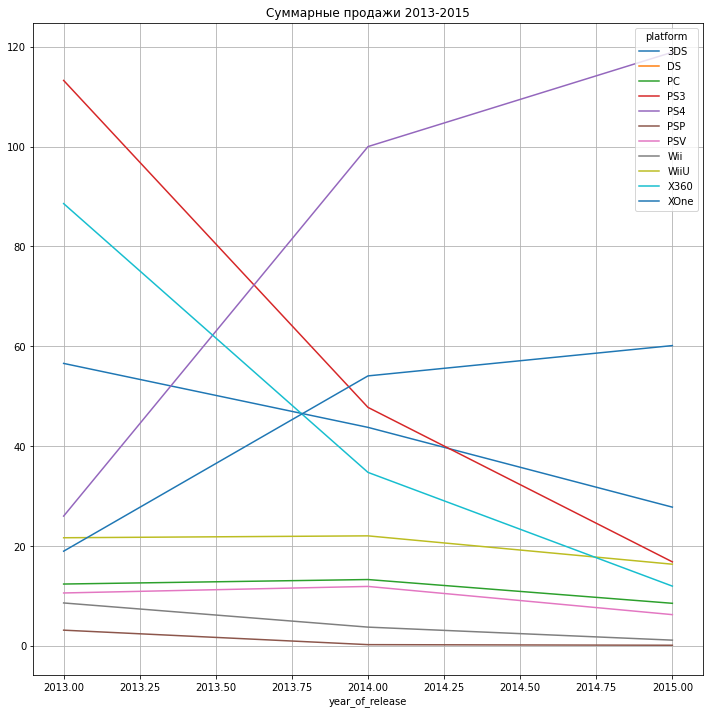

In [25]:
total_sales_sum = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc = 'sum')\
.plot(figsize = (12, 12), grid=True, title = 'Суммарные продажи 2013-2015')
plt.show()

Судя по графику за период времени с 2013 по 2015 годы, наилучший результат и рост продаж заметен у PS4, продажи растут вверх на протяжении всех лет. Что касается PS3 и X360, по графику видно, как продажи падают, это как раз таки можно свзять с тем, что вышла PS4. Среди самых не популярных платформ можно смело обозначить PSP и WII, их продажи не показывают динамики все 3 года

**Считаю суммарно проданные игры у каждой платформы за 2013-2015 годы**

In [26]:
data.groupby('platform').agg({'name':['count']})

,name
,count
platform,
3DS,257
DS,8
PC,135
PS3,307
PS4,228
PSP,67
PSV,273
Wii,22


**Вывожу числовое описание данных колонки**

In [27]:
data.groupby('platform').agg({'name':['count']}).describe()

,name
,count
count,11.000000
mean,157.363636
std,101.689009
min,8.000000
25%,84.000000
50%,160.000000
75%,242.500000
max,307.000000


**Строю график "ящик с усами" по глобаным продажам игр в разбивке по платформам**

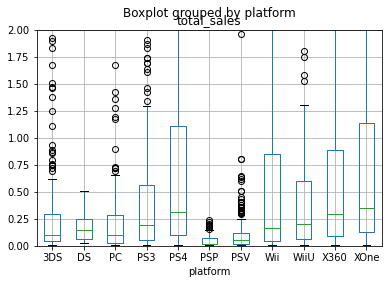

In [28]:
data.boxplot(by='platform', column='total_sales')
plt.ylim(0, 2)
plt.show()

График "ящик с усами" также отлично отражает, что наилучшие продажи за 2006-2015 годы были у Wii, Ds, PS3 и X360. Результаты данного графика идеально накладываются на результаты из предыдущих графиков

**Строю диаграмму рассеяния, чтобы понять, насколько сильно влияют отзывы критиков и отзывы пользователей на продажи популярных игр**

**Строю диаграмму рассения зависимости отзывов критиков от продаж**

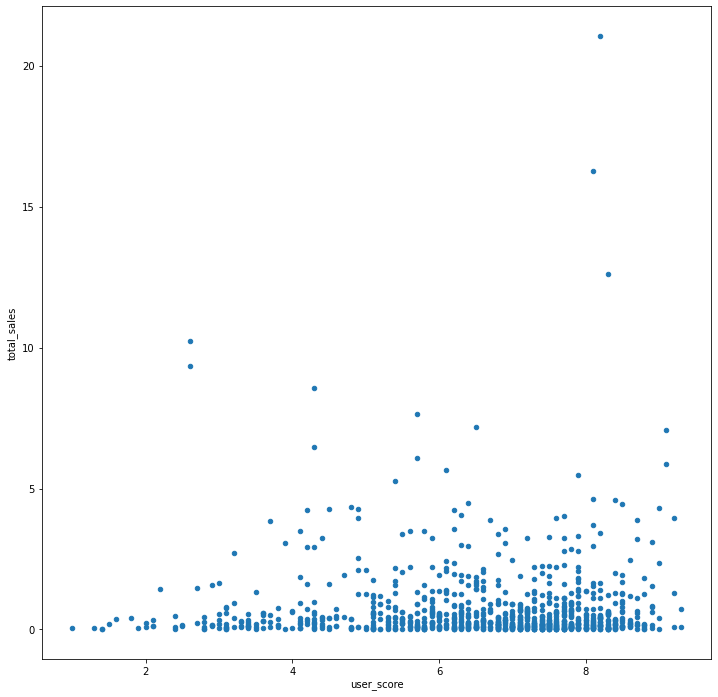

In [29]:
data.plot(x='user_score', y='total_sales', kind='scatter', figsize=(12,12))
plt.show()

**Строю диаграмму рассения зависимости отзывов пользователей от продаж**

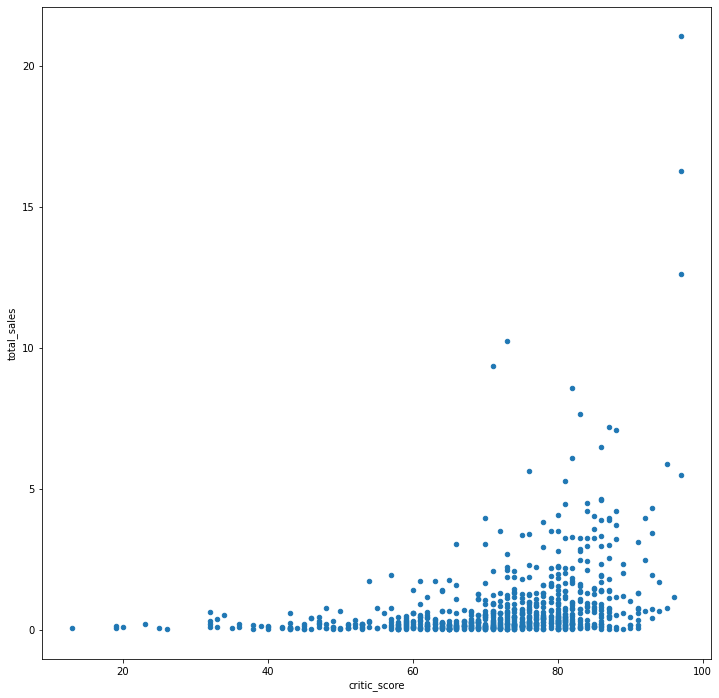

In [30]:
data.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(12,12))
plt.show()

**Считаю коэффициент корреляции Пирсона между отзывами пользователей и продажами**

In [31]:
print(data['total_sales'].corr(data['user_score']))

0.009741100114871235


**Считаю коэффициент корреляции Пирсона между отзывами критикой и продажами**

In [32]:
print(data['total_sales'].corr(data['critic_score']))

0.33122688603716643


Судя по графикам и рассчётам коэффициентов корреляции, продажи в зависимости от отзывов критиков и пользователей не зависит, но отзывы критиков влияют немного влияют

**Строю график зависимости жанра от продаж**

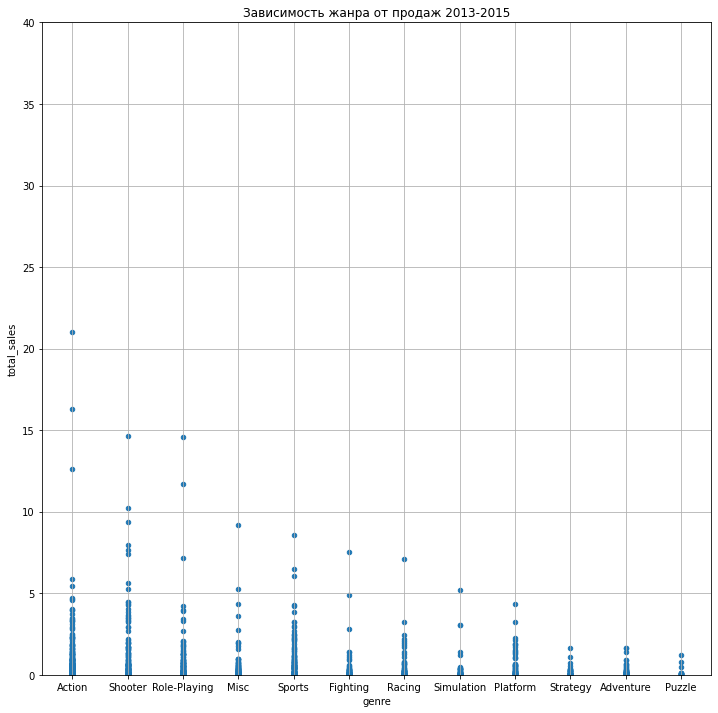

In [33]:
data.plot(x='genre', y='total_sales', kind='scatter', ylim=(0, 40), figsize=(12,12), grid=True,\
          title = 'Зависимость жанра от продаж 2013-2015')
plt.show()

Судя по графику выше, можно сделать вывод, что жанр игры очень сильно влияет на продажи. Есть как прибыльные, так и не прибыльные игровые жанры. Самые прибыльные жанры это Shooter и Action, сразу после них идёт жанр Sports. Наименее же прибыльные жанры это Simulation и Puzzle, их продажи очень слабые, если вравнивать с другими жанрами. Думаю, популярность игровой платформы PS4 очень сказывается и на популярности определённых жанров

###  Составляю портрет пользователя каждого региона

**Вывожу список 5 самых популярных платформ по продажам в Северной Америке**

In [34]:
na_sales_platform = data.groupby('platform').sum()['na_sales'].sort_values(ascending=False)
display(na_sales_platform.head(5))

platform
PS4     87.25
X360    80.97
XOne    78.85
PS3     62.83
3DS     34.06
Name: na_sales, dtype: float64

Самой популярной платформой, судя по прадажам, в Северной Америке, является PS4. На неё приходится 25% от всех продаж среди топ 5 самых продаваемых платформ. На X360 приходится 23.5%. X0ne - 23%, PS3 - 18%, 3DS - 10%. Всего в этом регионе 344 продажи, что составляет 46% от суммы всех продаж из 3 регионов

<div class="alert alert-success">

**Артём:** 👍👍 Верно.

</div>

**Вывожу список 5 самых популярных платформ по продажам в Европе**

In [35]:
eu_sales_platform = data.groupby('platform').sum()['eu_sales'].sort_values(ascending=False)
display(eu_sales_platform.head(5))

platform
PS4     109.31
PS3      66.55
XOne     41.96
X360     41.81
3DS      28.63
Name: eu_sales, dtype: float64

Самой популярной платформой, судя по прадажам, в Европе, является PS4. На неё приходится 38% от всех продаж среди топ 5 самых продаваемых платформ. На PS3 приходится 23%. X0ne - 14.5%, X360 - 14.5%, 3DS - 10%. Всего в этом регионе 289 продажи, что составляет 39% от суммы всех продаж из 3 регионов

**Вывожу список 5 самых популярных платформ по продажам в Японии**

In [36]:
jp_sales_platform = data.groupby('platform').sum()['jp_sales'].sort_values(ascending=False)
display(jp_sales_platform.head(5))

platform
3DS     59.78
PS3     22.05
PSV     15.03
PS4     10.22
WiiU    10.21
Name: jp_sales, dtype: float64

Самой популярной платформой, судя по прадажам, в Японии, является 3DS. На неё приходится 52% от всех продаж среди топ 5 самых продаваемых платформ. На PS3 приходится 19%. PSV - 13%, PS4 - 9%, WiiU - 9%. Всего в этом регионе 115 продажа, что составляет 15% от суммы всех продаж из 3 регионов

**Вывожу список 5 самых популярных жанров по продажам в Северной Америке**

In [37]:
na_sales_genre = data.groupby('genre').sum()['na_sales'].sort_values(ascending=False)
display(na_sales_genre.head(5))

genre
Action          116.76
Shooter          93.50
Sports           57.73
Role-Playing     40.51
Misc             26.73
Name: na_sales, dtype: float64

Самый популярный жанр в Северной Америке это Action, чуть менее популярны Shooter и Sports. Наименее популярным стал жанр Misc

**Вывожу список 5 самых популярных жанров по продажам в Европе**

In [38]:
eu_sales_genre = data.groupby('genre').sum()['eu_sales'].sort_values(ascending=False)
display(eu_sales_genre.head(5))

genre
Action          107.45
Shooter          71.96
Sports           48.51
Role-Playing     32.69
Misc             19.38
Name: eu_sales, dtype: float64

Самый популярный жанр в Европе это Action, чуть менее популярн Shooter и Sports. Наименее популярным стал жанр Misc

**Вывожу список 5 самых популярных жанров по продажам в Японии**

In [39]:
jp_sales_genre = data.groupby('genre').sum()['jp_sales'].sort_values(ascending=False)
display(jp_sales_genre.head(5))

genre
Role-Playing    44.43
Action          33.42
Misc             8.16
Fighting         6.90
Shooter          5.55
Name: jp_sales, dtype: float64

Самый популярный жанр в Японии это Role-Playing, чуть менее популярн Action и Misc. Наименее популярным стал жанр Shooter

Судя по данным о самых популярных платформах в Северной Америке, Европе и Японии, есть схожесть у Европы и Северной Америки, как по платформам, так и по игровым жанрам. Думаю, что игровые жанры сильно зависят от самой игровой платформы. Например, на платформе 3DS, которая является самой популярной платформой в Японии, вряд ли можно играть в жанры Shooter. Если и можно, то такие игры будут очень не популярны. Именно поэтому в Японии совершенно иные популярные жанры нежели в Северной Америке или Европе

**Вывожу список 5 самых популярных игр по продажам в Северной Америке по рейтингу ESRB**

In [40]:
na_sales_genre = data.groupby('rating').sum()['na_sales'].sort_values(ascending=False)
display(na_sales_genre.head(5))

rating
M          149.54
unknown     80.89
E           71.08
E10+        50.43
T           40.84
Name: na_sales, dtype: float64

**Строю диаграмму рассения зависимости рейтинга пользователей от продаж в Северной Америке**

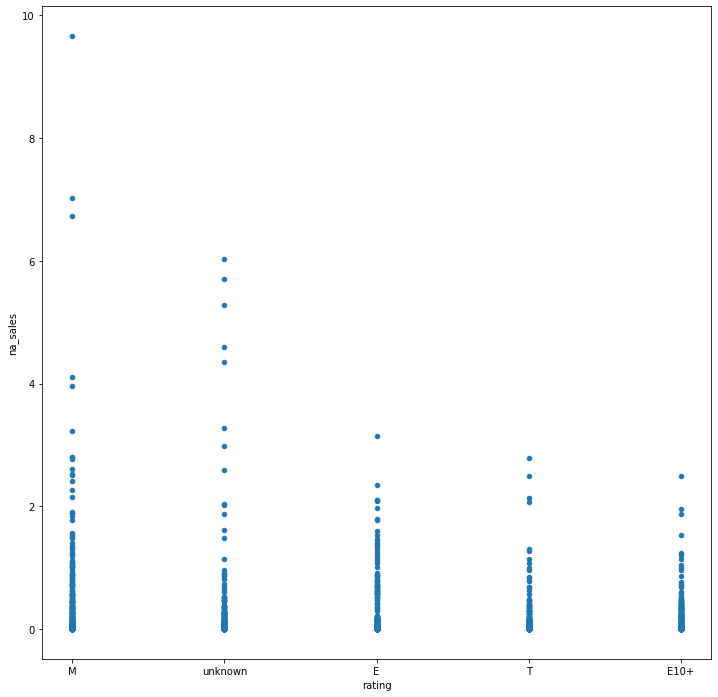

In [41]:
data.plot(x='rating', y='na_sales', kind='scatter', figsize=(12,12))
plt.show()

**Считаю коэффициент корреляции Пирсона между рейтингом и продажами в Северной Америке**

In [42]:
print(data['total_sales'].corr(data['na_sales']))

0.926307678248367


**Вывожу список 5 самых популярных игр по продажам в Европе по рейтингу ESRB**

In [43]:
eu_sales_genre = data.groupby('rating').sum()['eu_sales'].sort_values(ascending=False)
display(eu_sales_genre.head(5))

rating
M          128.78
unknown     71.44
E           69.75
E10+        38.88
T           32.16
Name: eu_sales, dtype: float64

**Строю диаграмму рассения зависимости рейтинга пользователей от продаж в Европе**

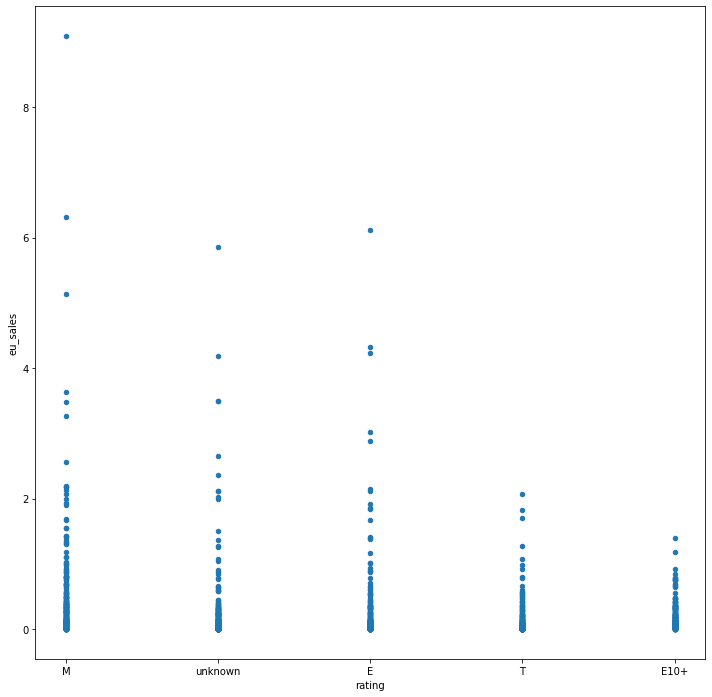

In [44]:
data.plot(x='rating', y='eu_sales', kind='scatter', figsize=(12,12))
plt.show()

**Считаю коэффициент корреляции Пирсона между рейтингом и продажами в Европе**

In [45]:
print(data['total_sales'].corr(data['eu_sales']))

0.9329895245907889


**Вывожу список 5 самых популярных игр по продажам в Японии по рейтингу ESRB**

In [46]:
jp_sales_genre = data.groupby('rating').sum()['jp_sales'].sort_values(ascending=False)
display(jp_sales_genre.head(5))

rating
unknown    70.73
T          18.32
E          14.07
M          12.91
E10+        5.44
Name: jp_sales, dtype: float64

**Строю диаграмму рассения зависимости рейтинга пользователей от продаж в Японии**

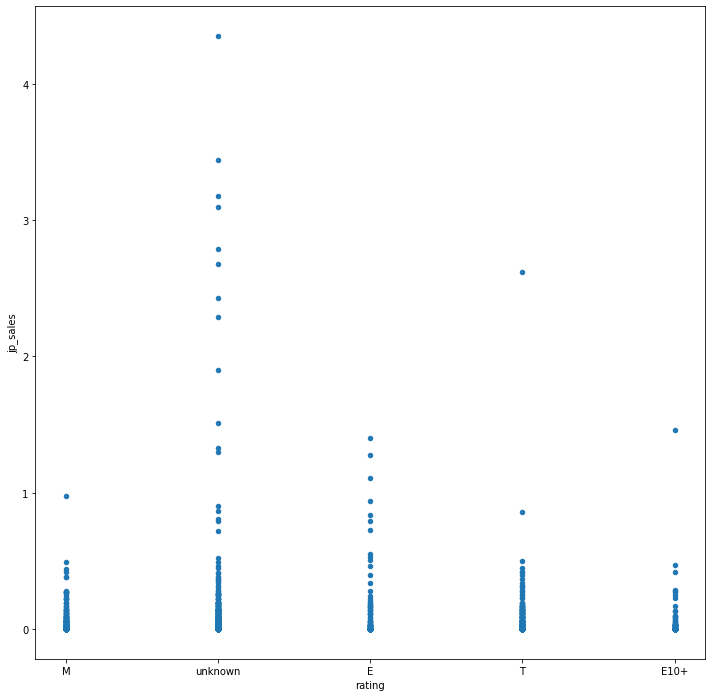

In [47]:
data.plot(x='rating', y='jp_sales', kind='scatter', figsize=(12,12))
plt.show()

**Считаю коэффициент корреляции Пирсона между рейтингом и продажами в Японии**

In [48]:
print(data['total_sales'].corr(data['jp_sales']))

0.42871657824936643


Рейтинг Северной Америки и Европы идентичен, по коэффициенту корреляции Пирсона видно, что продажи в Северной Америке и Европе сильно зависят от рейтинга, а в Японии это прослеживается слабо. Также, в Японии бОльшую часть занимают игры с рейтингом "unknown", о котором мы не можем сделать никаких выводов. Это также связано с тем, что в Японии по большей части используются непопулярные для других регионов игровые платформы, для которых даже рейтинг зачастую не выставляется. Самым популярным рейтингом для всех регионов принят "M"

In [49]:
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

### Проверяю гипотезы

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

H0: Средний пользовательский рейтинг Xbox One == Pc

H1: Средний пользовательский рейтинг Xbox One != Pc

In [50]:
results = st.ttest_ind(
    data[data['platform'] == 'XOne']['user_score'],
    data[data['platform'] == 'PC']['user_score'],
    equal_var = False, nan_policy="omit" 
)
    
alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.3093146382598502
Не получилось отвергнуть нулевую гипотезу


**Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные**

H0: Средний пользовательский рейтинг Action == Sports

H1: Средний пользовательский рейтинг Action != Sports

Считаю гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам

In [51]:
results = st.ttest_ind(
    data[data['genre'] == 'Action']['user_score'],
    data[data['genre'] == 'Sports']['user_score'],
    equal_var = False, nan_policy="omit" 
)
    
alpha = .05

print(results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

3.671310302373637e-18
Отвергаем нулевую гипотезу


In [52]:
data.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,na_sales_sum,eu_sales_sum,jp_sales_sum,other_sales_sum,total_sales
year_of_release,1.000000,-0.071632,-0.048055,-0.049867,-0.046416,0.046880,0.053837,NaN,NaN,NaN,NaN,-0.067388
na_sales,-0.071632,1.000000,0.786968,0.250625,0.818870,0.317483,-0.010853,NaN,NaN,NaN,NaN,0.926308
eu_sales,-0.048055,0.786968,1.000000,0.248031,0.938122,0.298819,-0.016990,NaN,NaN,NaN,NaN,0.932990
jp_sales,-0.049867,0.250625,0.248031,1.000000,0.189049,0.144842,0.208938,NaN,NaN,NaN,NaN,0.428717
other_sales,-0.046416,0.818870,0.938122,0.189049,1.000000,0.287837,-0.001537,NaN,NaN,NaN,NaN,0.919228
critic_score,0.046880,0.317483,0.298819,0.144842,0.287837,1.000000,0.517515,NaN,NaN,NaN,NaN,0.331227
user_score,0.053837,-0.010853,-0.016990,0.208938,-0.001537,0.517515,1.000000,NaN,NaN,NaN,NaN,0.009741
na_sales_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eu_sales_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
jp_sales_sum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Общий вывод

Проделанные мною действия:

**1. Получение данных и их изучение**

**2. Подготовка данных:**

- Замена названий столбцов
- Преобразование данных в нужные типы
- Обработка пропусков
- Подсчёт суммарных продаж во всех регионах

**3. Проведение исследовательнского анализа данных:**

- Подсчёт количества игр, которые выпускались в разные годы
- Подсчёт суммарных продаж во всех регионах по каждой игре
- Выделение 10 самых популярных платформ
- Построение графика, на котором будут собраны данные по суммарным продажам для каждой платформы
- Делаю срез данных с 2006 ро 2015 годы
- Построение диаграммы рассеяния, на которой видно, насколько сильно влияют отзывы критиков и отзывы пользователей на продажи популярных игр. Рассчёт коэффициента корреляции Пирсона
- Построение графика зависимости жанра от продаж

**4. Составляю портрет пользователя каждого региона:**

- Вывожу список 5 самых популярных платформ в каждом регионе
- Вывожу список 5 самых популярных жанров в каждом регионе
- Вывожу список 5 самых популярных игр по продажам в каждом регионе по рейтингу ESRB
- Строю диаграмму рассения зависимости рейтинга пользователей от продаж в каждом регионе
- Считаю коэффициент корреляции Пирсона между рейтингом и продажами в каждом регионе

**5. Проверяю гипотезы:**

- Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

- Гипотеза №2: Средние пользовательские рейтинги жанров Action и Sports разные

# Вывод

**Успешность игры в каждом из регионов определяется по своему, что связано с популярностью игровых платформ. Показатели Северной Америки и Европы примерно идентичны, поэтому выводы по этим двум регионам можно сделать одинаковыми. В Европе и Северной Америке успешность игры совершенно не зависит от оценок пользователей, на оценки критиков покупатели обращают гораздо больше внимания. Также, продажи в этих регионах очень зависят от рейтинга ESRB, поэтому при оценивании успешности новой игры стоит учитывать её рейтинг. Самыми продаваемыми жанрами в Северной Америке являются Action, Sports и Shooter, а самой популярной платформой на 2013-2015 годы является PS4. Учитывая, что PS4 вышла только в 2013 году, а к 2015 году её популярность только растёт, можно смело выпускать игру на этой платформе до 2018 года. Показатели Японии очень сильно отличаются от Северной Америки и Европы. В этом регионе больше всего стоит обратить внимание на игровые платформы, присущие Японии. Самая популярная игровая платформа на данный момент это 3DS. Несмотря на свою популярность этих платформ в Японии, в мире на 2013-2015 годы они уже утратили свою актуальность. Самыми популярными жанрами в Японии являются Role-Playing и Action. В целом, жанр Action является самым платёжеспособным жанром в мире. Популярность игры в Японии также немного зависит и от рейтинга ESRB, куда больше. чем от оценок критиков или пользователей**